# Fast Multiplication and the Discrete Fourier Transform

In this handout we will introduce the discrete Fourier Transform and use it to develop a multiplication algorithm that is much faster than the standard "schoolbook" algorithm.

Recall the standard algorithm uses a _quadratic_ number of word operations (in the length of the numbers being multiplied).  In this handout we will develop an algorithm that uses a _quasilinear_ number of word operations.

A function $f$ is said to be _quasilinear_ when $f(n)=O(n\log(n)^k)$ for some positive $k$.  Sometimes this is written as $f(n)=\tilde{O}(n)$ ("soft O" notation) and $f$ is said to be "softly linear".

## Improving Multiplication: Karatsuba's Algorithm

We will now cover the first multiplication algorithm that was discovered that asymptotically beats the quadratic running time of the standard "schoolbook" method.

This method was discovered by [Anatoly Karatsuba](https://en.wikipedia.org/wiki/Anatoly_Karatsuba) as a student in 1960 and presented at Moscow State University in a seminar run by [Andrey Kolmogorov](https://en.wikipedia.org/wiki/Andrey_Kolmogorov).  Kolmogorov credited Karatsuba and published a description of the algorithm in the _Proceedings of the USSR Academy of Sciences_ in 1962.

The basic idea is simple: To find an alternative way of representing the multiplication of two polynomials $A$ and $B$ that uses fewer coefficient multiplications than the schoolbook method.

Note that the schoolbook method multiplies two polynomials of degree $n-1$ uses exactly $n^2$ coefficient multiplications.  For example, if $n=2$, $A=a_1x+a_0$, and $B=b_1x+b_0$, then

\begin{align*}
AB = a_1b_1x^2 + (a_1b_0+a_0b_1)x + a_0b_0 .
\end{align*}

The schoolbook method computes this by evaluating each of the coefficient products which appear in this expression, i.e., $a_1b_1$, $a_1b_0$, $a_0b_1$, and $a_0b_0$.

### First Attempt: Decompose the product

Suppose $A$ and $B$ have even degree $n=2m$.  Then we can write them as

\begin{align*}
A &= A_1 x^{m} + A_0 \\
B &= B_1 x^{m} + B_0
\end{align*}

where $A_0,A_1,B_0,B_1$ have degree at most $m=n/2$.  Explicitly, we have $A_0=\sum_{i=0}^{m-1}a_ix^i$ and $A_1=\sum_{i=0}^{m}a_{i+m}x^i$.

Now we have

$$ AB = A_1B_1 x^n + (A_1B_0+A_0B_1)x^m + A_0B_0 . \tag{$*$} $$

Computing this expression uses four multiplications of polynomials of degree at most $m$.  However, recall that multiplication of two polynomials of degree $m$ uses $(m+1)^2=n^2/4+n+1$ coefficient multiplications.  The total number of coefficient multiplications using this method would be $(m+1)^2+2(m+1)m+m^2=4m^2+4m+1$, which is $(n+1)^2$.

Thus we haven't gained anything yet.  However, this was only the simplest possible way of decomposing the product $AB$ and we can rearrange this decomposition to get an improvement.

#### Side question: How many coefficient _additions_ does ($*$) require?

There are three additions on polynomials of degree at most $2n$:

* Adding $A_1B_0$ and $A_0B_1$
* Adding $A_0B_0$ to the result of the above (multiplied by $x^m$)
* Adding $A_1B_1x^n$ to the above

Each polynomial addition uses $O(n)$ coefficient additions, so there are $O(n)$ total coefficient additions.

### Alternative decomposition

Note that

$$(A_1+A_0)(B_1+B_0)=A_1B_1 + (A_1B_0+A_0B_1) + A_0B_0 . $$

The terms on the right have a striking similarity to the terms that appear on the right of ($*$).  For example, the parenthetized expression appears as the factor in front of $x^m$ in ($*$).

By adding and subtracting $A_1B_1x^m$ and $A_0B_0x^m$ on the right side the above expression and using ($*$) we derive

$$ AB = A_1B_1 (x^n - x^m) + (A_1+A_0)(B_1+B_0) x^m + A_0B_0 (1 - x^m) . \tag{$**$} $$

Computing the product $AB$ using this expression uses only _three_ multiplications of polynomials of degree $m$, although it does use more additions.

Listing the multiplications and additions explicitly:

#### Multiplications:
* $A_1B_1$
* $(A_1+A_0)(B_1+B_0)$
* $A_0B_0$

#### Additions:
* $A_1+A_0$
* $B_1+B_0$
* $A_0B_0$ added to $-A_0B_0x^m$
* $A_1B_1x^n$ added to $-A_1B_1x^m$
* $(A_1+A_0)(B_1+B_0) x^m$ added to $A_0B_0 (1 - x^m)$
* $A_1B_1 (x^n - x^m)$ added to the result of the previous line

### Why is this a big deal?

The fact that there are additional polynomial additions isn't a dealbreaker since polynomial addition is cheap and each of the polynomials above have degree at most $2n$.  But it would seem like using this alternative decomposition isn't that big of a deal since it only saves a single polynomial multiplication.  In other words, the number of coefficient multiplications should be $3m^2=0.75\cdot n^2$ which is still quadratic in $n$.

The key insight is that we can apply this method _recursively_ on each of the three polynomial multiplications that need to be computed.  Karatsuba's method is exactly that: compute the product from ($**$) and compute each of the polynomial multiplications $A_1B_1$, $(A_1+A_0)(B_1+B_0)$, and $A_0B_0$ recursively using Karatsuba's method.

The above description started out by assuming that $n$ was even, but it can easily be adapted to polynomials of any degree (which is important if we are to apply it recursively).

To do this, let $n=2^k$ be an upper bound on the degree of $A$ and $B$.  The above description goes through exactly the same except that now the coefficient lists of $A$ and $B$ are padded with zeros (if necessary) in order to make the coefficient list have length $n+1$.

### Cost analysis of Karatsuba's algorithm

Recursive algorithms are usually effectively analyzed using induction and Karatsuba's algorithm is no different.

Let $T(n)$ denote the cost (in terms of the number of coefficient operations) of multiplying two polynomials of degree at most $n$.

In fact, Karatsuba's algorithm uses $O(n^{\operatorname{lg}3})$ coefficient operations (where $\operatorname{lg}$ denotes the base-2 logarithm).

Since $n=2^k$ is an upper bound on the degree of polynomials, $n/2=2^{k-1}$ is an upper bound on the degree of the polynomials used in the recursive calls in Karatsuba's algorithm.  Since there are 3 recursive calls the recursive calls will cost at most $3T(n/2)$.  The only other coefficient operations are in the 4 polynomial additions of degree at most $2n$.  Altogether this will total at most $cn$ operations for some constant $c$, e.g., $c=8$ works (though this is not the best possible).  Thus we have that

$$ T(n) \leq 3T(n/2) + cn . $$

We will now prove that $T(2^k)\leq c(3^{k+1}-2^{k+1})$ using induction on $k$.

**Base case:** When $k=0$, $T(2^k)=5$ since multiplying two linear polynomials using Karatsuba's algorithm requires 3 coefficient multiplications and 2 coefficient additions.  Therefore $5=T(2^0)\leq c(3^1-2^1)=c$ holds (when $c\geq5$).

**Inductive step:** Suppose that $T(2^{k-1})\leq c(3^{k}-2^{k})$.  Then we have that

\begin{align*}
T(2^k) &\leq 3T(2^{k-1}) + c2^k \\
&\leq 3c(3^{k}-2^{k}) + c2^k &&\text{by inductive hypothesis} \\
&= c(3^{k+1}-2^{k+1}) &&\text{as required}.
\end{align*}

Now take $k=\operatorname{lg}n$ so that $2^k=n$ and $3^k=(2^{\operatorname{lg}3})^k=(2^k)^{\operatorname{lg}3}=n^{\operatorname{lg}3}$.

Then $T(n)\leq c(3n^{{\operatorname{lg}3}}-2n)=O(n^{\operatorname{lg}3})$ and so Karatsuba's algorithm applied to polynomials of degree $n$ runs in time $O(n^{\operatorname{lg}3})$.

### Master theorem

Note that the "[master theorem](<https://en.wikipedia.org/wiki/Master_theorem_(analysis_of_algorithms)>)" can be used to directly determine the cost of Karatsuba's algorithm.

The master theorem applies when a problem of size $n$ is recursively solved by an algorithm that makes $a$ recursive calls on subproblems that are a factor of $b$ smaller.  If $f(n)$ is the cost of splitting the problem and combining the results to find the final solution then analyzing this algorithm leads to the cost recurrence

$$ T(n) = a \cdot T(n/b) + f(n) $$

and when $f(n)=O(n^{\log_b a-\epsilon})$ for some $\epsilon>0$ the master theorem says that $T(n)=O(n^{\log_b a})$.

In Karatsuba's algorithm we have $a=3$, $b=2$, and $f(n)=O(n)$.

Since $f(n)=O(n)=O(n^{\log_2 3-\epsilon})$ for $\epsilon\approx0.58$ we have that $T(n)=O(n^{\log_2 3})$ by the master theorem.

### Takeaway

Because $\log_2 3\approx1.585$ Karatsuba's method enables multiplying polynomials in $O(n^{1.59})$ coefficient operations which is much faster than the standard $O(n^2)$ approach.  Furthermore, Karatsuba's algorithm can be adapted to multiply integers and the method is also effective in practice.

For example, it has been [implemented in the GMP library](https://gmplib.org/manual/Karatsuba-Multiplication) as one of the algorithms for multiplying large integers.  In fact, the GMP developers found that it could outperform the standard method for integers that fit in as little as 10 words.

The following diagram shows the fastest algorithm (as benchmarked in GMP) for multiplying an integer of length $x$ by an integer of length $y$ (with both axes represented on a log scale).

Karatsuba's method appears in pink and is referred to as "toom22" because it splits both operands into 2 parts (and is named after Andrei Toom, who in 1963 described a generalization of Karatsuba's method that splits the polynomial into more than 2 parts).

![Multiplication benchmark results](log.k10.550.png)

## Faster Multiplication: The Fast Fourier Transform

Now we will discuss an even better multiplication algorithm: one that is nearly linear in $n$, the degree of the polynomials (or length of the integers).  It is based on a fundamental operation that has many varied applications: the Fourier transform.

In particular, we will cover the _discrete Fourier transform_ (DFT) and how to compute it very efficiently using an algorithm known as the _fast Fourier transform_ (FFT).  The transform is called "discrete" because it operates on a discrete set of datapoints.  The Fourier transform can also be applied to continuous real-valued functions and this is very useful in fields such as signal processing.

### Prelude: Multiplication via interpolation

Recall the algorithm for multiplying polynomials we saw that was based on interpolation.  It had the following steps for multiplying two polynomials $A$ and $B$ of degree $n$:

1. Choose $2n+1$ distinct points and evaluate $A$ and $B$ at those points to get values $\alpha_0,\dotsc,\alpha_{2n}$ and $\beta_0,\dotsc,\beta_{2n}$.
2. Multiply the $\alpha_i$ and $\beta_i$ together.
3. Use interpolation to find the unique polynomial $C$ of degree $2n$ which has value $\alpha_i\beta_i$ at the $i$th chosen point.  It follows that $C$ is the result of multiplying $A$ by $B$.

We saw that steps 1 and 3 cost $O(n^2)$ while step 2 only costs $O(n)$.  This is interesting because it is in the cheapest step where the multiplication "actually happens"; steps 1 and 3 are really just changing the representation of the polynomial.  More precisely, step 1 changes the representation to a set of point-value pairs and then step 3 changes the representation back to a coefficient list.

#### How could this be improved?

Note that in step 1 we have a completely free choice of which points to evaluate $A$ and $B$ on.  The fundamental insight that lies behind the fast multiplication algorithm is to choose the points in such a way that steps 1 and 3 can be performed much more quickly by exploiting the structure of the chosen points.

<!--### Roots of Unity

How should the points be chosen?-->

As mentioned above, step 1 can be viewed as "transforming" the coefficient list representation of a polynomial to a point-value pair representation.  In fact, we will now see how to choose the points so that this transformation is given by the Fourier transform.

## Enter Fourier

Joseph Fourier was a French mathematician who developed the theory behind what are now known as Fourier series.  He introduced them to solve a partial differential equation known as the [heat equation](https://en.wikipedia.org/wiki/Heat_equation).

It was later realized that Fourier series have a huge number of other practical uses: Wikipedia lists applications to electrical engineering, vibration analysis, acoustics, optics, signal processing, image processing, quantum mechanics, econometrics, and shell theory, among others.

For our purposes we will use _discrete Fourier series_ or more commonly called the _discrete Fourier transform_.

### Optimal selection of points

Which points should we choose in order to improve the multiplication-via-interpolation algorithm?

One possibility would be to choose the points to be powers of a fixed base, e.g., choose the points to be $2^0,2^1,2^2,\dotsc,2^{2n}$.

This choice would allow some computations to be reused.  For example, in order to evaluate $A(2)$ one uses $2,2^2,\dotsc,2^n$ and in order to evaluate $A(2^2)$ one uses $2^2,2^4\dotsc,2^{2n}$ (so these would not have to be recomputed).

There are more values which could be reused but not all, since for example the evaluation of $A(2^{2n})$ uses $(2^{2n})^n=2^{2n^2}$ which will not have been computed before.  This scheme also has the drawback that the numbers involved get extremely large.  It could be improved if the numbers involved in evaluating $A$ were not too large and correspond _exactly_ with the set of points.

In other words, to chose points $p_0,\dotsc,p_{2n}$ so that <!--for all $0\leq i,j\leq 2n$ the value $p_i^j$ is equal $p_k$ for some $k$.-->

$$ \bigl\{\, p_i^j : 0\leq i,j\leq 2n \,\bigr\} = \{p_0,\dotsc,p_{2n}\} . $$

This can be done if the points are chosen to form a _group_ under multiplication.  This is a set of numbers containing the identity $1$ and which is closed under multiplication and division.  The multiplication in a group must also satsisfy the associative law $(a\cdot b)\cdot c=a\cdot(b\cdot c)$, though this will always hold (indeed by definition it holds in any ring).

In particular, we will chose points $p_0,\dotsc,p_{2n}$ to form a _cyclic group_ of order $2n+1$.  A cyclic group has a generator element from which all group elements can be obtained simply by raising the generator to higher powers.

### Roots of unity

A _root of unity_ is an element $\omega$ such that $\omega^n=1$ for some positive integer $n$.  For example, $1$ is a trivial root of unity.

If $\omega^n=1$ then $\omega$ is also said to be an $n$th root of unity.

Furthermore, if $\omega^n=1$ but $\omega^m\neq1$ for all $1\leq m<n$ then $\omega$ is a _primitive_ $n$th root of unity.  Recall we already encountered primitive $(p-1)$th roots of unity in $\mathbb{Z}_p^*$ when discussing the Diffie&ndash;Hellman protocol.

It would be ideal if we could take our points to be the group generated by some $(2n+1)$th primitive root of unity (since we have to choose $2n+1$ points).

However, not all coefficient rings will contain contain primitive $(2n+1)$th roots of unity.  For example, the only roots of unity at all in $\mathbb{Z}$, $\mathbb{Q}$, and $\mathbb{R}$ are $\pm1$.  We have that $-1$ is a primitive $n$th root of unity for $n=2$ but there are no primitive $n$th roots of unity in these rings for any larger $n$.

### Hope is not lost!

However, it can be possible to work in a strictly larger ring which contains _both_

1. all the elements of the coefficient ring of the polynomials being multiplied, and
2. a primitive $(2n+1)$th root of unity.

If the coefficients of the polynomials are over the integers, rationals, or the real numbers then one conveinient choice is to work over the complex numbers $\mathbb{C}$ which _do_ contain primitive $n$th roots of unity for arbitrary $n$.

### Primitive roots over the complex numbers

The fundamental theorem of algebra says that a polynomial of degree $n$ has $n$ roots (though not necessarily distinct).

Since the $n$th roots of unity are exactly the roots of the polynomial $x^n-1$, the complex numbers must contain $n$th roots of unity.

#### What form do these roots take?

Over the complex numbers we have the factorization

$$ x^n - 1 = \prod_{k=0}^{n-1}\bigl(x-e^{2\pi i k/n}\bigr) $$

so the $n$th roots of unity are given by $e^{2\pi ik/n}$ for $k=0,1,\dotsc,n-1$.

#### Complex exponential

How does it even make sense to exponentiate a number by an _imaginary_ power?  In fact, there is a simple and elegant answer to this seeming impossibility given by **Euler's formula**&mdash;one of the most shocking formulae in all of mathematics.

Euler's formula says that if $t$ is a real number then

$$ e^{i t} = \cos t + i\sin t . $$

##### Intuition for Euler's formula

How are we to make sense of Euler's formula?  One way is to realize that the function $t\mapsto e^t$ represents a function whose rate-of-change is equal to $e^t$ at time $t$.  If you imagine you are in a car that is at position $e^t$ at time $t$ then your speed is exactly $e^t$ at time $t$.

Similarly, if you are in a car that is at position $e^{ct}$ at time $t$ then your speed is exactly $ce^{ct}$ (i.e., $c$ times your current position) at time $t$.

What if you were in a car that had position $e^{it}$ at time $t$?  To be consistent with the above your speed should be $i$ times your current position&mdash;except it should be _velocity_ instead of speed since complex numbers are actually vectors and not scalars.

Note that the "multiply-by-$i$" function ($z\mapsto i\cdot z$) is the function that applies a rotation of 90 degrees (i.e., $\pi/2$ radians) to the input but keeps the magnitude of the input the same.

Thus having a "velocity of $i$" means that you are being pushed sideways to your current position.  It's as if you were in a car with the front wheels rotated 90 degrees to the left.  When you try to accelerate the car would initially move perpendicular to the road but as the car's position changes the act of continually having a sideways velocity relative to your current point will cause the car to circularly rotate around a point rather than move sideways.

Thus, in a car with position $e^{it}$ you would start at position $1$ at $t=0$ with a velocity of $i$.  This would initially propel you upwards in the complex plane but as you move upwards the velocity will start to change to be perpendicular to your current position.  This would turn you to your to your left and ultimately cause you to rotate in a circle around the origin.

The speed of the rotation will be $\bigl|\frac{\textrm{d}}{\textrm{d}t}e^{it}\bigr|=|ie^{it}|=|i|\cdot|e^{it}|$.  The absolute value of a complex number is its distance from the origin, so $|i|=1$.  Moreover, we've just seen that $e^{it}$ will be on the unit circle and therefore $|e^{it}|=1$.  Thus, the speed of the rotation will be exactly 1, i.e., at time $t=\theta$ the car will have travelled exactly a distance of $\theta$ along the unit circle to arrive at the point $(\sin\theta,\cos\theta)$.  This gives Euler's formula $e^{i\theta}=\cos\theta+i\sin\theta$.

#### Visualization

Euler's formula implies that the roots of unity all lie the unit circle (i.e., the circle with radius 1 and centre 0 when the complex numbers are visualized using a two-dimensional plane).

The $n$th roots of unity are explicitly given by

$$ e^{2\pi ik/n} = \cos\Bigl(\frac{2\pi k}{n}\Bigr) + i\sin\Bigl(\frac{2\pi k}{n}\Bigr) \qquad\text{for $k=0,1,\dotsc,n-1$} $$

and the following code plots the $n$th roots of unity for $n=11$.

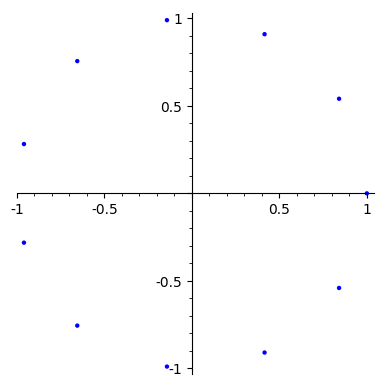

In [1]:
n = 11
list_plot([e^(2*pi*i*k/n) for k in range(n)], aspect_ratio=1)

As you can see, there are eleven 11th roots of unity over the complex numbers and they appear equally-spaced along the unit circle.

In this case all but the rightmost (i.e., the root 1) are primitive 11th roots of unity.  This occurs because 11 is prime, but in general there will be more non-primitive roots of unity.  For example, the following code plots the fifteen $n$th roots of unity for $n=15$, with the primitive $n$th roots of unity in red:

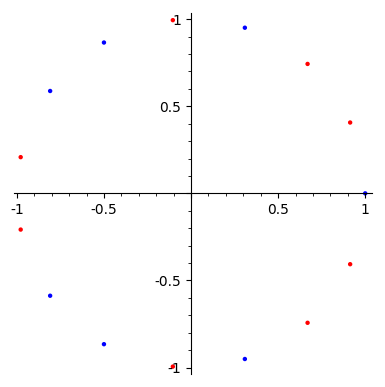

In [2]:
n = 15
prim_roots = list_plot([e^(2*pi*i*k/n) for k in range(n) if gcd(k,n)==1], color=(1,0,0))
non_prim_roots = list_plot([e^(2*pi*i*k/n) for k in range(n) if gcd(k,n)>1], aspect_ratio=1)
non_prim_roots + prim_roots

### Evaluation and interpolation at roots of unity

Let's consider our previous algorithm for multiplying polynomials but now using roots of unity as the chosen points.

Input: Polynomials $A$ and $B$ of degree at most $n$.

**Step 0:** Set $N=2n+1$ and compute the $N$th roots of unity $\omega^0,\dotsc,\omega^{N-1}$ where $\omega:=e^{2\pi i/N}$.

**Step 1:** Evaluate $A$ and $B$ at the $N$th roots of unity to obtain $\alpha_k$ and $\beta_k$, i.e.,

$$ \alpha_k := A\bigl(\omega^{k}\bigr), \qquad \beta_k := B\bigl(\omega^{k}\bigr) \qquad\text{for $k=0,1,\dotsc,N-1$}. $$

**Step 2:** For each $0\leq k<N$ multiply $\alpha_k$ and $\beta_k$.

**Step 3:** Interpolate $C=AB$ from the $N$ point-value pairs $\bigl\{\,(\omega^{k},\alpha_k\beta_k) : 0\leq k<N \,\bigr\}$.

Although this algorithm will work correctly so far this selection of points is not asymptotically faster than any other selection of points.  For example, step 1 requires computing the vector $[\alpha_0,\dotsc,\alpha_{N-1}]$ given by

$$ \bigl[A(1),A(\omega),A(\omega^{2})\dotsc,A(\omega^{N-1})\bigr] = \biggl[\, \sum_{j=0}^{N-1}a_j\omega^{jk} : 0\leq k<N \,\biggr] . \tag{$*$} $$

The factor $\omega^{jk}$ which appears in the summation can quickly be determined in advance.  Note that the function $t\mapsto \omega^{t}$ is periodic with period $N$, so it follows that
$\omega^{jk} = \omega^{jk\bmod N}$.

Thus every factor $\omega^{jk}$ appearing in the sum is one of the $N$th roots of unity which have already been computed in advance.

This saves some computing, but it still is not asymptotically faster because it still requires $O(n)=O(N)$ multiplications and additions to compute a _single_ entry in this vector.  Since there are $N$ entries in the vector computing them all still takes $O(N^2)$ operations in $\mathbb{C}$.

It would seem like we're stuck now, but a very clever trick allows us to compute the vector ($*$) much faster than computing the vector entry-by-entry.  We'll see how to compute it in almost _linear_ time instead of quadratic time.

## The Discrete Fourier Transform

The vector appearing in ($*$) is exactly the discrete Fourier transform (DFT)!  The DFT takes as input a vector $[a_0,\dotsc,a_{N-1}]$ of length $N$ and produces as output a "transformed" vector also of length $N$.  Formally, we say

$$ \operatorname{DFT}\bigl([\,a_k : 0\leq k<N\,]\bigr) := \biggl[\, \sum_{j=0}^{N-1}a_je^{2\pi ijk/N} : 0\leq k<N \,\biggr] . $$

**Example.**

Say $N=4$, so $\omega=e^{2\pi i/N}=i$.  We now compute $\operatorname{DFT}([a_0,a_1,a_2,a_3])$ entry-by-entry.

The first entry (i.e., the entry of index $k=0$) is $\sum_{j=0}^3 a_j i^{0j} = \sum_{j=0}^3 a_j = a_0+a_1+a_2+a_3$.

The second entry is $\sum_{j=0}^3 a_j i^{j}=a_0+ia_1-a_2-ia_3$.

The third entry is $\sum_{j=0}^3 a_j i^{2j}=\sum_{j=0}^3 a_j (-1)^{j}=a_0-a_1+a_2-a_3$.

The fourth entry is $\sum_{j=0}^3 a_j i^{3j}=\sum_{j=0}^3 a_j (-i)^{j}=a_0-ia_1-a_2+ia_3$.

As two explicit examples, we have:
\begin{align*}
\operatorname{DFT}\bigl([1,1,1,1]\bigr) &= [4,0,0,0] \\
\operatorname{DFT}\bigl([1,2,3,4]\bigr) &= [10,-2-2i,-2,-2+2i] 
\end{align*}

### Cost analysis

How many arithmetic operations in $\mathbb{C}$ does computing the discrete Fourier transform of a vector of length $N$ require if done entry-by-entry?

We can assume the $N$th roots of unity are known during the computation; in fact they are exactly $\{1,\omega,\omega^2,\omega^3,\dotsc,\omega^{N-1}\}$ where $\omega:=e^{2\pi i/N}=\cos(2\pi/N)+i\sin(2\pi/N)$.  Once $\omega$ is known computing all roots of unity uses $O(N)$ multiplications.

Now consider computing the $k$ entry of DFT on $[a_0,\dotsc,a_{N-1}]$ which is $\sum_{j=0}^{N-1}a_j\omega^{jk}$.  Since $\omega^{jk}=\omega^{jk\bmod N}$ computing this factor requires no multiplications.  However, there are still $O(N)$ multiplications and additions required in order to compute this summation.

Therefore computing all $N$ entries of the DFT uses $O(N^2)$ arithmetic operations.

So far we haven't gained anything&mdash;but what makes the DFT special is that it can actually be computed extremely quickly by exploiting a special property.

## The Fast Fourier Transform

The fast Fourier transform (FFT) is an algorithm that can quickly compute the DFT of a vector.

But how can we possibly improve on the $O(N^2)$ arithmetic operations used in the entry-by-entry computation?

The trick is to not compute the DFT entry-by-entry but instead use an algorithm that computes its entries simultaneously while exploiting the highly structured way in which the entries of the DFT are defined.

In particular, notice what happens when you perform a DFT on _only the even-index entries_ of a vector and the odd-index entries replaced by $0$, i.e., a vector of the form $[a_0,0,a_2,0,a_4,\dotsc,a_{N-2},0]$ (assuming $N$ is even).

We have

\begin{align*}
\renewcommand{\DFT}{\operatorname{DFT}}\DFT\bigl([a_0,0,a_2,0,a_4,\dotsc,a_{N-2},0]\bigr) &= \biggl[\, \sum_{\substack{j=0\\\text{$j$ even}}}^{N-1}a_je^{2\pi ijk/N} : 0\leq k<N \,\biggr] \\
&= \biggl[\, \sum_{j=0}^{N/2-1}a_{2j}e^{2\pi ijk/(N/2)} : 0\leq k<N \,\biggr] \\
&= \bigl[V;V\bigr] \text{ where } V := \biggl[\, \sum_{j=0}^{N/2-1}a_{2j}e^{2\pi ijk/(N/2)} : 0\leq k<\frac{N}{2} \,\biggr] .
\end{align*}
Here $[V;V]$ denotes the concatenating $V$ with itself (i.e., the entries in $V$ are repeated).

Take a close look at the definition of $V$ above.  Notice anything interesting about $V$?

### The trick

The main trick that makes the FFT work is that $V$ can be expressed as a DFT of a vector shorter than $N$.  In fact, $V$ is actually the DFT of $[a_0,a_2,a_4,\dotsc,a_{N-2}]$ (a vector of length $N/2$) because

$$ \DFT\bigl([a_0,a_2,a_4,\dotsc,a_{N-2}]\bigr) = \biggl[\, \sum_{j=0}^{N/2-1}a_{2j}e^{2\pi ijk/(N/2)} : 0\leq k<\frac{N}{2} \,\biggr] . $$

A similar property holds for the vector with only the odd-index entries remaining:

\begin{align*}
\DFT\bigl([0,a_1,0,a_3,\dotsc,0,a_{N-1}]\bigr) &= \biggl[\, \sum_{\substack{j=0\\\text{$j$ odd}}}^{N-1}a_je^{2\pi ijk/N} : 0\leq k<N \,\biggr] \\
&= \biggl[\, \sum_{j=0}^{N/2-1}a_{2j+1}e^{2\pi i(2j+1)k/N} : 0\leq k<N \,\biggr] \\
&= \biggl[\, e^{2\pi ik/N}\sum_{j=0}^{N/2-1}a_{2j+1}e^{2\pi ijk/(N/2)} : 0\leq k<N \,\biggr] \\
&= \bigl[\,e^{2\pi ik/N}:0\leq k<N\,\bigr] * \bigl[U;U\bigr] \\
&\quad\text{where } U := \biggl[\, \sum_{j=0}^{N/2-1}a_{2j+1}e^{2\pi ijk/(N/2)} : 0\leq k<\frac{N}{2} \,\biggr] \\
&\quad\text{and $*$ is pointwise multiplication}
\end{align*}

Note that the vector $U$ here can also be expressed as the DFT of $[a_1,a_3,\dotsc,a_{N-1}]$ (a vector of length $N/2$).

### Why is this useful?

These expressions can be used to derive an expression for the DFT of a vector of even length $N$ in terms of the DFT of two vectors of length $N/2$.  This expression is a consequence of the above identities and as a result of the fact that the DFT is a linear operator (in other words $\DFT(X+Y)=\DFT(X)+\DFT(Y)$).  In particular, we have

\begin{align*}
\DFT\bigl([a_0,a_1,\dotsc,a_{N-1}]\bigr) &= \DFT\bigl([a_0,0,a_2,0\dotsc,a_{N-2},0]\bigr) + \DFT\bigl([0,a_1,0,a_3,\dotsc,0,a_{N-1}]\bigr) \\
&= \bigl[V;V\bigr] + \bigl[\,e^{2\pi ik/N}:0\leq k<N\,\bigr] * \bigl[U;U\bigr] \\
&\quad\text{where $V=\DFT\bigl([a_0,a_2,\dotsc,a_{N-2}]\bigr)$ and $U=\DFT\bigl([a_1,a_3,\dotsc,a_{N-1}]\bigr)$} .
\end{align*}

Denoting the entries of $V$ by $v_k$ and the entries of $U$ by $u_k$ (for $0\leq k<N/2$) it follows that:

* The $k$th entry of the DFT of $[a_0,\dotsc,a_{N-1}]$ is $v_k+e^{2\pi i k/N}u_k$.
* The $(k+N/2)$th entry of the DFT of $[a_0,\dotsc,a_{N-1}]$ is $v_{k}-e^{2\pi i k/N}u_{k}$ (because $e^{2\pi i (N/2) / N}=e^{\pi i}=-1$).

### Cost Analysis

As before, we can write $\omega:=e^{2\pi i/N}$ and compute all $N$th roots of unity using $O(N)$ multiplications once $\omega$ is known.  All other field operations are either additions or multiplications by an appropriate power of $\omega$.

For simplicity, suppose $N$ is a power of two so that every recursive case splits cleanly.

Let $T(N)$ denote the number of field operations required to compute a DFT of length $N$ using the fast Fourier transform.  

**Base case.** $T(1)=0$ since $\DFT([x])=[x]$ for a scalar $x$.

**Recursive case.** Computing a DFT of length $N$ requires computing the two DFTs $V$ and $U$ of length $N/2$.  It is then necessary to compute $\omega^ku_k$ for $0\leq k<N/2$ which uses $N/2$ multiplications as well as $v_k\pm\omega^k u_k$ for $0\leq k<N/2$ which uses $N/2$ additions and $N/2$ subtractions.

In total, this means we have the recurrence $T(N)=2T(N/2)+3N/2$.

The master theorem with $a=b=2$ and $f(n)=3n/2$ can be used on this recurrence.  We have that $f(n)=\Theta(n^{\log_b a})$ so the master theorem implies that $T(n)=O(n^{\log_b a}\log n)=O(n\log n)$.

## The Inverse Fourier Transform

The fast Fourier transform allows us to evaluate a polynomial at roots of unity $\{\,\omega^k : 0\leq k < N\,\}$ very quickly.

What about the _inverse_ operation?  Given a vector containing the evaluations of a polynomial at roots of unity can we find the polynomial quickly?

In other words, from the evaluations $\bigl[\, f(1), f(\omega), f(\omega^2), \dotsc, f(\omega^{N-1}) \,\bigr]$ find the unique polynomial $f$ of degree at most $N-1$ which produces those evaluations.

In fact, we will show that the inverse problem is essentially just a discrete Fourier transform with $\omega$ replaced by $\omega^{-1}$, the multiplicative inverse of $\omega$ (which is also a root of unity).

Let $[a_0,\dotsc,a_{N-1}]$ be the coefficient vector of $f$ and let $[A_0,\dotsc,A_{N-1}]$ be the vector of evaluations of $f$ at powers of $\omega^k$ for $0\leq k<N$ (i.e., the DFT of the coefficient vector).

Let's compute the discrete Fourier transform of $[A_0,\dotsc,A_{N-1}]$ but using the root of unity $\omega^{-1}$ instead of $\omega$.  The $l$th entry of this vector will be

\begin{align*}
\sum_{k=0}^{N-1} A_k(\omega^{-1})^{kl} &= \sum_{k=0}^{N-1} \sum_{j=0}^{N-1}a_j\omega^{jk}\omega^{-kl} \\
&= \sum_{k=0}^{N-1} \sum_{j=0}^{N-1}a_j\omega^{k(j-l)} \\
&= \sum_{j=0}^{N-1}a_j \cdot \sum_{k=0}^{N-1} \omega^{k(j-l)} \\
&= \sum_{j=0}^{N-1}a_j \cdot \begin{cases}
\sum_{k=0}^{N-1} \omega^0 & \text{if $j=l$} \\
\sum_{k=0}^{N-1} \tilde\omega_j^k & \text{if $j\neq l$, where $\tilde\omega_j$ is some root of unity not equal to $1$}
\end{cases} \\
&= \sum_{j=0}^{N-1}a_j \cdot \begin{cases}
N & \text{if $j=l$} \\
0 & \text{if $j\neq l$, since $\sum_{k=0}^{N-1} \tilde\omega^k=\frac{\tilde\omega^N-1}{\tilde\omega-1}=\frac{1-1}{\tilde\omega-1}=0$}
\end{cases} \\
&= N a_l
\end{align*}

Let $\DFT_\omega$ denote the discrete Fourier transform using the root of unity $\omega$.  Then we have shown that

$$\DFT_{\omega^{-1}}(\DFT_\omega([a_0,\dotsc,a_{N-1}]))=[Na_0,Na_1,\dotsc,Na_{N-1}].$$

Dividing both sides by $N$,

$$ \frac{1}{N}\,\DFT_{\omega^{-1}}(\DFT_\omega([a_0,\dotsc,a_{N-1}]))=[a_0,\dotsc,a_{N-1}]. $$

In other words, the inverse of the discrete Fourier transform $\DFT_\omega$ is given by $\frac{1}{N}\DFT_{\omega^{-1}}$.

**Example.**

Recall that $\DFT_\omega\bigl([1,2,3,4]\bigr) = [10,-2-2i,-2,-2+2i]$ where $\omega=e^{2\pi i/4}=i$.

To reverse this operation we compute <!--apply $\frac{1}{N}\DFT_{\omega^{-1}}$:-->
$\DFT_{\omega^{-1}}\bigl([10,-2-2i,-2,-2+2i]\bigr)$ and then multiply by $\frac{1}{N}=\frac{1}{4}$.
Computing this vector entry-by-entry:

Its first entry is $$10 + (-2-2i) + (-2) + (-2+2i) = 4 . $$

Its second entry is $$10 + (-2-2i)\omega^{-1} + (-2)\omega^{-2} + (-2+2i)\omega^{-3} = 
10 + (-2-2i)(-i) + (-2)(-1) + (-2+2i)(i) = 8.$$

Its third entry is $$10 + (-2-2i)\omega^{-2} + (-2)\omega^{-4} + (-2+2i)\omega^{-6} =
10 + (-2-2i)(-1) + (-2) + (-2+2i)(-1) = 12.$$

Its fourth entry is $$10 + (-2-2i)\omega^{-3} + (-2)\omega^{-6} + (-2+2i)\omega^{-9} =
10 + (-2-2i)(i) + (-2)(-1) + (-2+2i)(-i) = 16.$$

Thus $\frac{1}{N}\DFT_{\omega^{-1}}\bigl([10,-2-2i,-2,-2+2i]\bigr)=\frac{1}{4}[4,8,12,16]=[1,2,3,4]$ as expected.

### Computation

Note that the FFT algorithm also equally applies to computing $\DFT_{\omega^{-1}}$ quickly; one merely replaces $\omega$ with $\omega^{-1}$ when performing the FFT. 

## Fast Multiplication: Putting it Together

Combining the fast Fourier transform with the evaluation/interpolation multiplication algorithm we finally achieve a fast multiplication algorithm.

In detail, the steps of the algorithm are as follows on input polynomials $f,g\in\mathbb{C}[x]$ of degree $n$:

Let $N:=2n+1$ and $\omega:=e^{2\pi i/N}$.  Say $A$ and $B$ are the coefficient vectors of $f$ and $g$ (extended with zeros to be of length $N$).

**Step 1.**  Compute $\DFT_\omega(A)$ and $\DFT_\omega(B)$ using the fast Fourier transform.

**Step 2.**  Compute the entrywise product $C:=\DFT_\omega(A)*\DFT_\omega(B)$.

**Step 3.**  Compute $\DFT^{-1}_\omega(C)$ using the fast Fourier transform.  Its entries will be the coefficient vector of the product $f\cdot g$.

The correctness of this algorithm follows from the correctness of the evaluation/interpolation multiplication algorithm.

It also relies on the fact that computing a DFT is equivalent to evaluatating a polynomial at powers of $\omega$ and computing an inverse DFT is equivalent to interpolating a polynomial from its evaluations at powers of $\omega$.

### Cost analysis

Step 1 does two FFTs and uses $O(N\log N)$ operations.

Step 2 does $N$ coefficient multiplications and uses $O(N)$ operations.

Step 3 does one inverse FFT and uses $O(N\log N)$ operations.

Since $N=2n+1$ these costs can equivalently be presented using $n$ instead of $N$.

Thus, in total we can multiply two polynomials of degree $n$ using $O(n\log n)$ operations.

### Caveats

This analysis assumed we were working over the complex numbers where primitive $N$th roots of unity exist.

The algorithm can also be used over any field containing primitive $N$th roots of unity, though they do not exist in all fields.  Primitive $(p-1)$th roots of unity do exist in $\mathbb{Z}_p^*$ but they do not exist in $\mathbb{Q}$ or $\mathbb{R}$ (with the exception of $-1$).

If $p$ is a prime of the form $k2^m+1$ then $\mathbb{Z}_p^*$ contains a primitive $N$th root of unity with $N:=2^m$ so the multiplication algorithm we described will also work to multiply two polynomials in $\mathbb{Z}_p[x]$ of degree less than $N/2$.

The algorithm can also be adapted to coefficient rings like which do not contain primitive roots of unity by constructing "artificial" primitive roots of unity.  This increases the total running cost by a factor of $\log\log N$.

## Integer Multiplication

The algorithm can also be relatively straightforwardly adapted to multiply integers quickly.

In 1971, [A. Schönhage and V. Strassen](https://link.springer.com/article/10.1007/BF02242355) presented an FFT-based algorithm for multiplying two integers of $n$ words that runs in $O(n\log n\log\log n)$ word operations.  Their algorithm is also effective in practice (e.g., it is implemented in the GMP library).

Slight improvements to this running time were discovered by various researchers over the past fifty years.

Surprisingly, it was only in 2019 when [D. Harvey and J. van der Hoeven](https://annals.math.princeton.edu/2021/193-2/p04) presented an algorithm matching the polynomial multiplication runtime and multiplies two integers of $n$ words in $O(n\log n)$ word operations.  (However, their algorithm is purely theoretical and not used in practice.)

### Can this be improved?

It is currently unknown if multiplication algorithms exist that use fewer than $O(n\log n)$ word/coefficient operations&mdash;none have ever been found.

Some researchers have conjectured that $O(n\log n)$ word/coefficient operations is indeed the fastest possible running time of multiplication.